# Import Standard Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the datasets

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df.shape

(381109, 12)

# Datasets Information

In [5]:
df.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
39366,39367,Male,46,1,28.0,0,1-2 Year,Yes,40510.0,26.0,98,1
32956,32957,Male,40,1,11.0,1,1-2 Year,Yes,44950.0,124.0,107,0
347911,347912,Male,46,1,28.0,0,1-2 Year,Yes,29167.0,157.0,91,0
124672,124673,Male,59,1,22.0,0,> 2 Years,Yes,30923.0,124.0,104,0
128684,128685,Male,25,1,6.0,1,< 1 Year,No,17480.0,152.0,296,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# Grouping Categorical and Numerical Feature

In [8]:
cats = []
nums = []
for i in df:
    if df[i].dtype=='object':
        cats.append(i)
    else:
        nums.append(i)

In [9]:
print(nums)
print(cats)

['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']
['Gender', 'Vehicle_Age', 'Vehicle_Damage']


In [10]:
df[nums].describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [11]:
df[cats].describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [12]:
for n in df:
    if df[n].dtype=='object':
        print(df[n].value_counts())
        print('----')

Male      206089
Female    175020
Name: Gender, dtype: int64
----
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64
----
Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64
----


# Handling Missing Values

In [13]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

# Handling Duplicated Data

In [14]:
df.duplicated().sum()

0

# Feature Encoding

In [15]:
cats_updated = ['Gender','Vehicle_Damage']
for col in cats_updated:
    df = pd.concat([df, (pd.get_dummies(df[col]))], axis=1)
    df.drop(col, axis=1, inplace=True)

In [16]:
mapping_vehicle_age = {
    '< 1 Year' : 0,
    '1-2 Year' : 1,
    '> 2 Years' : 2
}
df['Vehicle_Age'] = df['Vehicle_Age'].map(mapping_vehicle_age)

In [17]:
df.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Female,Male,No,Yes
0,1,44,1,28.0,0,2,40454.0,26.0,217,1,0,1,0,1
1,2,76,1,3.0,0,1,33536.0,26.0,183,0,0,1,1,0
2,3,47,1,28.0,0,2,38294.0,26.0,27,1,0,1,0,1
3,4,21,1,11.0,1,0,28619.0,152.0,203,0,0,1,1,0
4,5,29,1,41.0,1,0,27496.0,152.0,39,0,1,0,1,0


# Correlation Check between feature

<AxesSubplot:>

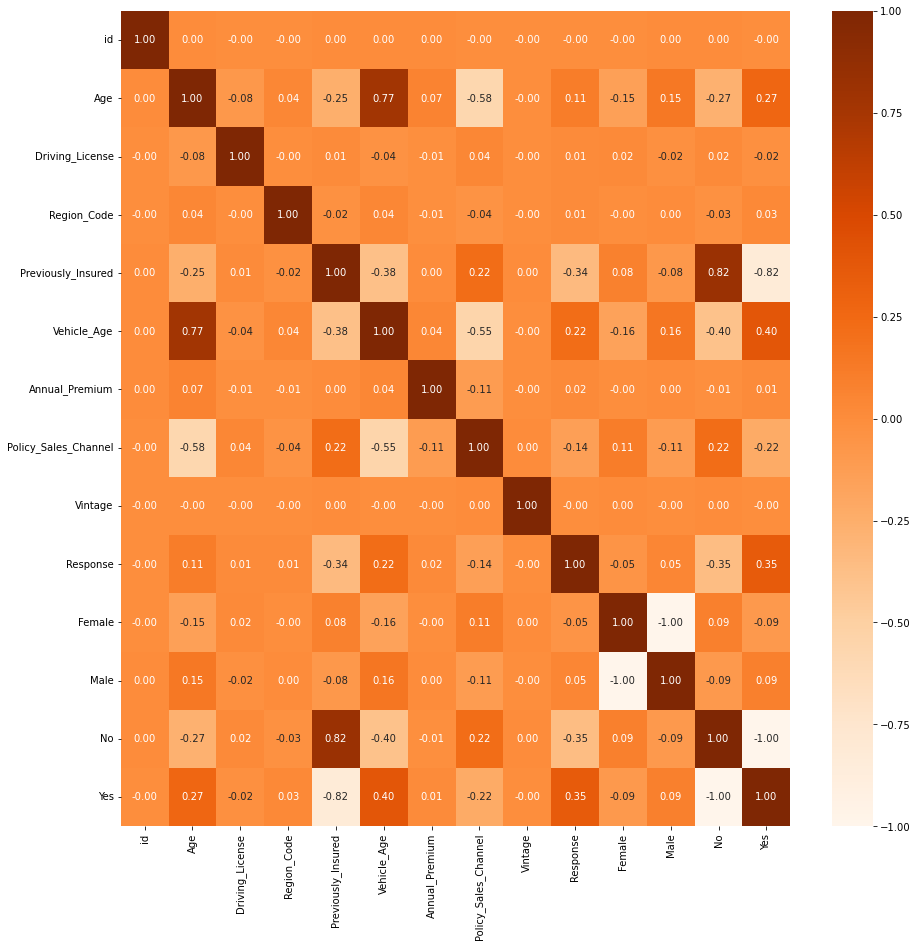

In [18]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='Oranges', annot=True, fmt='.2f')

# Drop columns has low correlation with Response

In [19]:
df = df.drop(columns=['id','Driving_License','Region_Code','Annual_Premium','Vintage','Female','No'])

In [20]:
df.head()

,Age,Previously_Insured,Vehicle_Age,Policy_Sales_Channel,Response,Male,Yes
0,44,0,2,26.0,1,1,1
1,76,0,1,26.0,0,1,0
2,47,0,2,26.0,1,1,1
3,21,1,0,152.0,0,1,0
4,29,1,0,152.0,0,0,0


# Handling Imbalance & Train Test Split Dataset

In [21]:
one = df[df.Response == 1]
zero = df[df.Response == 0]

In [22]:
print(one.shape)
print(zero.shape)

(46710, 7)
(334399, 7)


In [23]:
zero_sample = zero.sample(n=46710)

In [24]:
zero_sample.shape

(46710, 7)

In [25]:
new_dataset = pd.concat([zero_sample, one], axis=0)

In [26]:
new_dataset['Response'].value_counts()

0    46710
1    46710
Name: Response, dtype: int64

In [27]:
X, y = new_dataset.drop('Response', axis=1), new_dataset['Response']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [29]:
X_train.shape

(65394, 6)

In [30]:
y_train.value_counts()

1    32783
0    32611
Name: Response, dtype: int64

# Standarization

In [31]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Modeling

## Random Forest Classifier

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc, classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import RandomizedSearchCV

In [33]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=23)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
y_pred_train_rf = model_rf.predict(X_train)

print('Accuracy for Test data :', accuracy_score(y_test, y_pred_rf))
print('Accuracy for Train data :', accuracy_score(y_train, y_pred_train_rf))

Accuracy for Test data : 0.7826660957682152
Accuracy for Train data : 0.8201516958742392


In [34]:
print('F1 score for Test data :', f1_score(y_test, y_pred_rf))
print('F1 score for Train data :', f1_score(y_train, y_pred_train_rf))

F1 score for Test data : 0.8031669090321538
F1 score for Train data : 0.8373688067812547


In [35]:
print('ROC AUC Score for Test data :', roc_auc_score(y_test, y_pred_rf))
print('ROC AUC Score for Train data :', roc_auc_score(y_train, y_pred_train_rf))

ROC AUC Score for Test data : 0.7833348050591562
ROC AUC Score for Train data : 0.8198789179635754


### ROC - AUC test data

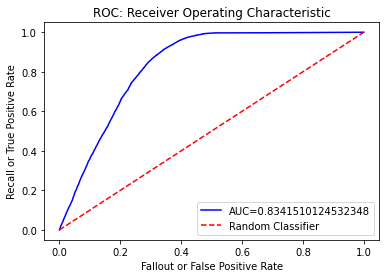

In [36]:
prob_estimates_rf = model_rf.predict_proba(X_test)

fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, prob_estimates_rf[:, 1])
nilai_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, 'b', label=f'AUC={nilai_auc_rf}')
plt.plot([0,1], [0,1], 'r--', label='Random Classifier')

plt.title('ROC: Receiver Operating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Positive Rate')
plt.legend()
plt.show()

### Hyperparameters Tuning

In [46]:
rf_params = {'bootstrap' : [True, False],
             'max_depth' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'max_features' : ['auto','sqrt'],
             'min_samples_leaf' : [1, 2, 4],
             'min_samples_split' : [2, 5, 10],
             'n_estimators' : [130, 180, 230]}

rfc = RandomForestClassifier()

random_search_rf = RandomizedSearchCV(rfc, param_distributions=rf_params, n_iter=5, scoring='f1', n_jobs= -1, cv=5, verbose=3)

In [47]:
random_result_rf = random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [48]:
final_model_rf = rfc.set_params(**random_result_rf.best_params_)

In [49]:
final_model_rf.fit(X_train, y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=40, max_features='auto', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=130)

In [50]:
y_pred_final_rf = final_model_rf.predict(X_test)

### Before Hyperparameters

In [51]:
print('Accuracy for Test data :', accuracy_score(y_test, y_pred_rf))
print('F1 score for Test data :', f1_score(y_test, y_pred_rf))
print('ROC AUC Score for Test data :', roc_auc_score(y_test, y_pred_rf))

Accuracy for Test data : 0.7826660957682152
F1 score for Test data : 0.8031669090321538
ROC AUC Score for Test data : 0.7833348050591562


### After Hyperparameters

In [52]:
print('Accuracy for Test data :', accuracy_score(y_test, y_pred_final_rf))
print('F1 score for Test data :', f1_score(y_test, y_pred_final_rf))
print('ROC AUC Score for Test data :', roc_auc_score(y_test, y_pred_final_rf))

Accuracy for Test data : 0.7877685006779419
F1 score for Test data : 0.8102105934907468
ROC AUC Score for Test data : 0.7885239028653217


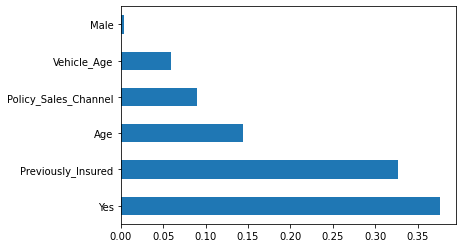

In [53]:
feat_importances_rf = pd.Series(final_model_rf.feature_importances_, index= X.columns)
feat_importances_rf.nlargest(7).plot(kind='barh')
plt.show()

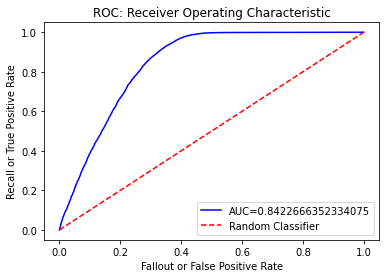

In [54]:
prob_estimates_rf = final_model_rf.predict_proba(X_test)

fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, prob_estimates_rf[:, 1])
nilai_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, 'b', label=f'AUC={nilai_auc_rf}')
plt.plot([0,1], [0,1], 'r--', label='Random Classifier')

plt.title('ROC: Receiver Operating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Positive Rate')
plt.legend()
plt.show()

## XGBOOST

In [38]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(random_state=23)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
y_pred_train_xgb = model_xgb.predict(X_train)

print('Accuracy for Test data :', accuracy_score(y_test, y_pred_xgb))
print('Accuracy for Train data :', accuracy_score(y_train, y_pred_train_xgb))

Accuracy for Test data : 0.7878755441375865
Accuracy for Train data : 0.8066489280362112


In [39]:
print('F1 score for Test data :', f1_score(y_test, y_pred_xgb))
print('F1 score for Train data :', f1_score(y_train, y_pred_train_xgb))

F1 score for Test data : 0.8101427522115415
F1 score for Train data : 0.8274045155477899


In [40]:
print('ROC AUC Score for Test data :', roc_auc_score(y_test, y_pred_xgb))
print('ROC AUC Score for Train data :', roc_auc_score(y_train, y_pred_train_xgb))

ROC AUC Score for Test data : 0.7886250376502164
ROC AUC Score for Train data : 0.8063382085092499


### ROC - AUC 

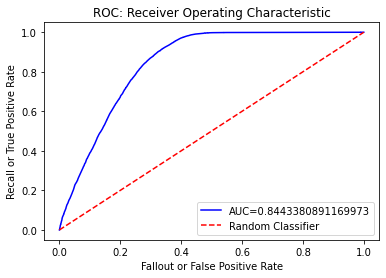

In [41]:
prob_estimates_xgb = model_xgb.predict_proba(X_test)

fpr_xgb, tpr_xgb, threshold_xgb = roc_curve(y_test, prob_estimates_xgb[:, 1])
nilai_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.plot(fpr_xgb, tpr_xgb, 'b', label=f'AUC={nilai_auc_xgb}')
plt.plot([0,1], [0,1], 'r--', label='Random Classifier')

plt.title('ROC: Receiver Operating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Positive Rate')
plt.legend()
plt.show()

### Hyperparameters tuning

In [55]:
xgb_params = {
"learning_rate" : [0.05, 0.1, 0.15, 0.2, 0.3],
"max_depth"     : [5, 10, 15],
"min_child_weight" : [1, 3, 5 ,7],
"gamma"         : [0.0, 0.1, 0.2, 0.3, 0.4],
"colsample_bytree" : [0.3, 0.4, 0.5, 0.7]
}

xgbc = XGBClassifier()

random_search_xgb = RandomizedSearchCV(xgbc, param_distributions= xgb_params, n_iter=5, scoring='f1', n_jobs= -1, cv= 5, verbose=3)

In [56]:
random_result_rf = random_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [57]:
final_model_xgb = xgbc.set_params(**random_result_rf.best_params_)

In [58]:
final_model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [59]:
y_pred_final_xgb = final_model_xgb.predict(X_test)

### Before Hyperparameters

In [60]:
print('Accuracy for Test data :', accuracy_score(y_test, y_pred_xgb))
print('F1 score for Test data :', f1_score(y_test, y_pred_xgb))
print('ROC AUC Score for Test data :', roc_auc_score(y_test, y_pred_xgb))

Accuracy for Test data : 0.7878755441375865
F1 score for Test data : 0.8101427522115415
ROC AUC Score for Test data : 0.7886250376502164


### After Hyperparameters

In [61]:
print('Accuracy for Test data :', accuracy_score(y_test, y_pred_final_xgb))
print('F1 score for Test data :', f1_score(y_test, y_pred_final_xgb))
print('ROC AUC Score for Test data :', roc_auc_score(y_test, y_pred_final_xgb))

Accuracy for Test data : 0.7922643259830158
F1 score for Test data : 0.8166645673258597
ROC AUC Score for Test data : 0.7931109969911758


### Feature Importance

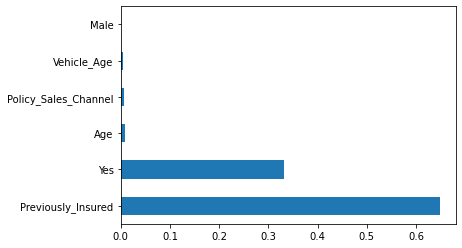

In [62]:
feat_importances_xgb = pd.Series(final_model_xgb.feature_importances_, index= X.columns)
feat_importances_xgb.nlargest(7).plot(kind='barh')
plt.show()

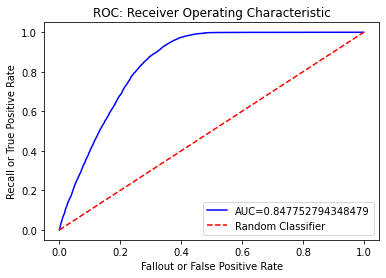

In [63]:
prob_estimates_rf = final_model_xgb.predict_proba(X_test)

fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, prob_estimates_rf[:, 1])
nilai_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, 'b', label=f'AUC={nilai_auc_rf}')
plt.plot([0,1], [0,1], 'r--', label='Random Classifier')

plt.title('ROC: Receiver Operating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Positive Rate')
plt.legend()
plt.show()

## LightGBM

In [42]:
import lightgbm as lgb
model_lgb = lgb.LGBMClassifier(random_state=23)
model_lgb.fit(X_train, y_train)
y_pred_lgb = model_lgb.predict(X_test)
y_pred_train_lgb = model_lgb.predict(X_train)


print('Accuracy for Test data :', accuracy_score(y_test, y_pred_lgb))
print('Accuracy for Train data :', accuracy_score(y_train, y_pred_train_lgb))

Accuracy for Test data : 0.7905873117819168
Accuracy for Train data : 0.8012202954399487


In [43]:
print('F1 score for Test data :', f1_score(y_test, y_pred_lgb))
print('F1 score for Train data :', f1_score(y_train, y_pred_train_lgb))

F1 score for Test data : 0.8129640842601741
F1 score for Train data : 0.8229236197196529


In [44]:
print('ROC AUC Score for Test data :', roc_auc_score(y_test, y_pred_lgb))
print('ROC AUC Score for Train data :', roc_auc_score(y_train, y_pred_train_lgb))

ROC AUC Score for Test data : 0.7913513607192965
ROC AUC Score for Train data : 0.8009034649475056


### ROC-AUC

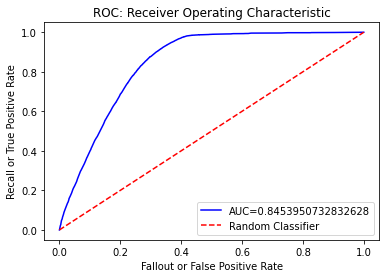

In [45]:
prob_estimates_lgb = model_lgb.predict_proba(X_test)

fpr_lgb, tpr_lgb, threshold_lgb = roc_curve(y_test, prob_estimates_lgb[:, 1])
nilai_auc_lgb = auc(fpr_lgb, tpr_lgb)

plt.plot(fpr_lgb, tpr_lgb, 'b', label=f'AUC={nilai_auc_lgb}')
plt.plot([0,1], [0,1], 'r--', label='Random Classifier')

plt.title('ROC: Receiver Operating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Positive Rate')
plt.legend()
plt.show()

### Hyperparameters Tuning

In [64]:
lgbm_params = { 'n_estimators' : [100,200,300],
                'learning_rate' : [0.01, 0.05, 0.1, 0.3],
                'num_leaves' : [20, 50, 80, 100],
                'boosting_type' : ['gbdt','dart','goss']
}

lgbmc = lgb.LGBMClassifier()

random_search_lgb = RandomizedSearchCV(lgbmc, param_distributions = lgbm_params, n_iter=5, n_jobs = -1, cv = 5, scoring = 'f1', verbose=3)

In [65]:
random_result_lgb = random_search_lgb.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [66]:
final_model_lgb = lgbmc.set_params(**random_result_lgb.best_params_)

In [67]:
final_model_lgb.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', learning_rate=0.01, n_estimators=200,
               num_leaves=50)

In [68]:
y_pred_final_lgb = final_model_lgb.predict(X_test)

### Before Hyperparameters

In [69]:
print('Accuracy for Test data :', accuracy_score(y_test, y_pred_lgb))
print('F1 score for Test data :', f1_score(y_test, y_pred_lgb))
print('ROC AUC Score for Test data :', roc_auc_score(y_test, y_pred_lgb))

Accuracy for Test data : 0.7905873117819168
F1 score for Test data : 0.8129640842601741
ROC AUC Score for Test data : 0.7913513607192965


### After Hyperparameters

In [70]:
print('Accuracy for Test data :', accuracy_score(y_test, y_pred_final_lgb))
print('F1 score for Test data :', f1_score(y_test, y_pred_final_lgb))
print('ROC AUC Score for Test data :', roc_auc_score(y_test, y_pred_final_lgb))

Accuracy for Test data : 0.7908370798544209
F1 score for Test data : 0.8145406226271829
ROC AUC Score for Test data : 0.7916512867116634


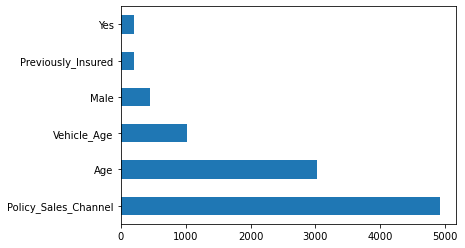

In [71]:
feat_importances_lgb = pd.Series(final_model_lgb.feature_importances_, index= X.columns)
feat_importances_lgb.nlargest(8).plot(kind='barh')
plt.show()

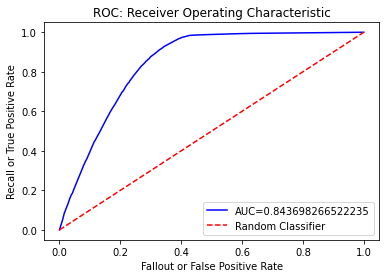

In [72]:
prob_estimates_rf = final_model_lgb.predict_proba(X_test)

fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, prob_estimates_rf[:, 1])
nilai_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, 'b', label=f'AUC={nilai_auc_rf}')
plt.plot([0,1], [0,1], 'r--', label='Random Classifier')

plt.title('ROC: Receiver Operating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Positive Rate')
plt.legend()
plt.show()